In [1]:
#Import libraries for simulation
import tensorflow as tf
import numpy as np
from sympy import *

import matplotlib.pyplot as plt


# Error in the text

The next import was put by me. It provides clear_output() function. 

In [2]:
import IPython.display as display

In [3]:
def make_kernel(a):
    """Transform a 2D array into a convolution kernel"""

    """Only one set of print output indicates
    this is called only once"""
    
    a = np.asarray(a)
    """
    print("a.ndim: {}; a.shape: {}".format( a.ndim, a.shape))
    print("a: ", a)
    """

    a = a.reshape(list(a.shape) + [1,1])

    """print("a.ndim: {}; a.shape: {}".format( a.ndim, a.shape))
    print("a.ndim", a.ndim)
    print("a: ", a)"""
    
    """NOTE: Returned as tf.constant"""
    return tf.constant(a, dtype=1)

# Question

The above function appears to be called only once. Uncommenting the print commands shows only one set of prints.

In the function laplace() below the call is made to make_kernel(). And laplace() is called every iteration

laplace_k is a tf.constant. Is that WHY the call is not made?
    


In [4]:
def simple_conv(x, k):
  """A simplified 2D convolution operation"""
  x = tf.expand_dims(tf.expand_dims(x, 0), -1)
  y = tf.nn.depthwise_conv2d(x, k, [1, 1, 1, 1], padding='SAME')
  return y[0, :, :, 0]

def laplace(x):
    """Compute the 2D laplacian of an array"""
    laplace_k = make_kernel([[0.5, 1.0, 0.5],
                           [1.0, -6., 1.0],
                           [0.5, 1.0, 0.5]])
    """
    The following print takes place only once.
    Q. This function is called only once?"""
    #print(laplace_k)
    result = simple_conv(x, laplace_k)
    print ("Result: {}".format(result))
    return result

The size of the pond is N pixels by N pixels

In [5]:

N = 500


In [6]:
# Set everything to zero
u_init = np.zeros([N, N], dtype=np.float32)
ut_init = np.zeros([N, N], dtype=np.float32)


Raindrops barely show-up in the image plot. Instead of many raindrops, drop just one "brick" (meteorite?) The brick is dropped in the center of the pond

In [7]:
# Some rain drops hit a pond at random points
#for n in range(100 * 2):
#  a,b = np.random.randint(0, N, 2)
#  u_init[a,b] = np.random.uniform(low=0, high=10)

a = N/2; b = N/2
SideOfBrick = 20
Delta_PlusMinus = int(SideOfBrick/2)


Compute the 2D array of pixels that will initially be impactedby the "brick".

In [8]:
for i in range(-Delta_PlusMinus, Delta_PlusMinus, 1):
    for j in range(-Delta_PlusMinus, Delta_PlusMinus, 1):
        x = int(a + i); y = int(b + j)
        u_init[x, y] = 100

 Display the impact zone

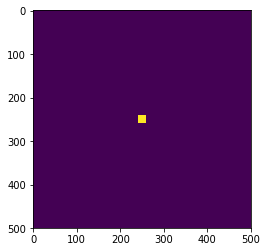

In [9]:
plt.imshow(u_init)
plt.show()


In [10]:
# Create variables for simulation state
U  = tf.Variable(u_init)
Ut = tf.Variable(ut_init)
# Parameters:
# eps -- time resolution
# damping -- wave damping
eps = tf.placeholder(tf.float32, shape=())
damping = tf.placeholder(tf.float32, shape=())



In [11]:
# Discretized PDE update rules
U_ = U + eps * Ut
Ut_ = Ut + eps * (laplace(U) - damping * Ut)

iter_count = tf.Variable(0)
iter_count_updt = iter_count.assign_add(1)

# Operation to update the state
step = tf.group(
    U.assign(U_),
    Ut.assign(Ut_),
    iter_count_updt)



Result: Tensor("strided_slice:0", shape=(500, 500), dtype=float32)


In [12]:
sess = tf.InteractiveSession()
# Initialize state to initial conditions
tf.global_variables_initializer().run()



iter_count:991


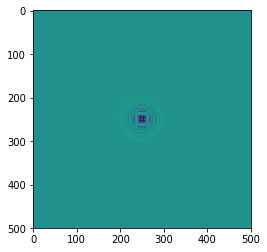

In [13]:
# Run 1000 steps of PDE
for i in range(1000):
  # Step simulation
    step.run({eps: 0.03, damping: 0.04})
        # Visualize every 5 steps
    if i % 10 == 0:
        display.clear_output()
        print("iter_count:{}".format(iter_count.eval()))
        plt.imshow(U.eval())
        plt.show()



In [14]:
sess.close()
